In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box


In [2]:
path_hma_extent = "data/hma-extent/HMA/hma_gtng_202307_subregions.gpkg"
path_gla_station_info = "data/ground-observation/glacier-station/glacier_station_info.gpkg"


In [3]:
hma = gpd.read_file(path_hma_extent)
gla_info_gdf = gpd.read_file(path_gla_station_info)
gla_info_gdf


,glacier,rgi_id,date,resolution(m),data_size,geometry
0,24k,RGI2000-v7.0-G-15-16601,20231014,0.035,35978 × 50313,"POLYGON ((95.72406 29.75652, 95.72406 29.76811..."
1,24k,RGI2000-v7.0-G-15-16601,20240712,0.033,38454 × 52468,"POLYGON ((95.72369 29.7564, 95.72369 29.76811,..."
2,KQGR,RGI2000-v7.0-G-13-61313,20230713,0.043,25112 × 36884,"POLYGON ((90.20499 29.85913, 90.20499 29.86917..."
3,KQGR,RGI2000-v7.0-G-13-61313,20230812,0.044,25586 × 35782,"POLYGON ((90.20506 29.8586, 90.20506 29.8692, ..."
4,LAIGU,RGI2000-v7.0-G-15-14618,20230718,0.269,12536 × 15929,"POLYGON ((96.81806 29.28251, 96.81806 29.31367..."
5,LAIGU,RGI2000-v7.0-G-15-14618,20231017,0.265,12006 × 17449,"POLYGON ((96.82136 29.2829, 96.82136 29.31243,..."
6,P4,RGI2000-v7.0-G-15-14585,20230805,0.056,46282 × 33462,"POLYGON ((96.94171 29.24191, 96.94171 29.26567..."
7,P4,RGI2000-v7.0-G-15-14585,20231017,0.054,50726 × 37174,"POLYGON ((96.94177 29.24047, 96.94177 29.26554..."


In [4]:
gla_info_gdf['lon_center'] = (gla_info_gdf.bounds.minx + gla_info_gdf.bounds.maxx) / 2
gla_info_gdf['lat_center'] = (gla_info_gdf.bounds.miny + gla_info_gdf.bounds.maxy) / 2

In [5]:
colors = {"24k":"red","KQGR":"blue","LAIGU":"green","P4":"purple"}
gla_info_gdf["color"] = gla_info_gdf["glacier"].map(colors)
gla_show_gdf = gla_info_gdf.drop_duplicates("glacier")  # 每个实测脚点只显示一个（实测日期不同但位置相同）
gla_show_gdf


,glacier,rgi_id,date,resolution(m),data_size,geometry,lon_center,lat_center,color
0,24k,RGI2000-v7.0-G-15-16601,20231014,0.035,35978 × 50313,"POLYGON ((95.72406 29.75652, 95.72406 29.76811...",95.714917,29.762318,red
2,KQGR,RGI2000-v7.0-G-13-61313,20230713,0.043,25112 × 36884,"POLYGON ((90.20499 29.85913, 90.20499 29.86917...",90.196684,29.864147,blue
4,LAIGU,RGI2000-v7.0-G-15-14618,20230718,0.269,12536 × 15929,"POLYGON ((96.81806 29.28251, 96.81806 29.31367...",96.795672,29.298087,green
6,P4,RGI2000-v7.0-G-15-14585,20230805,0.056,46282 × 33462,"POLYGON ((96.94171 29.24191, 96.94171 29.26567...",96.931802,29.253785,purple


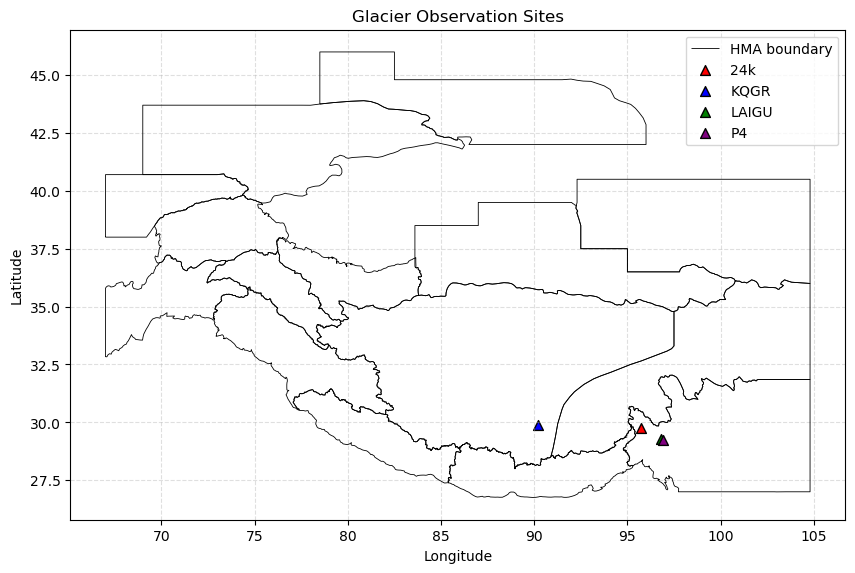

In [6]:
colors = {"24k":"red","KQGR":"blue","LAIGU":"green","P4":"purple"}
fig, ax = plt.subplots(figsize=(10,10))
hma.boundary.plot(ax=ax, edgecolor="black", linewidth=0.6, label="HMA boundary")
for idx, row in gla_show_gdf.iterrows():
    ax.scatter(row['lon_center'], row['lat_center'], 
               marker="^", s=50, edgecolor="black", c=row["color"], label=row["glacier"])
ax.legend()
ax.set_xlabel("Longitude"); ax.set_ylabel("Latitude")
ax.grid(True, linestyle="--", alpha=0.4)
ax.set_title("Glacier Observation Sites")
fig.savefig("figures/ground-observation/glacier_station_loc.png", bbox_inches='tight', dpi=200)
